#  k-means

## Project Description

In this project suppose that you're a data analyst at Netflix and you want to explore the similarities and differences in people's tastes in movies based on how they rate different movies. Can understanding these ratings contribute to a movie recommendation system for users? Let's dig into the data and see.

The data we'll be using comes from [MovieLens](https://movielens.org/) [user rating dataset](https://grouplens.org/datasets/movielens/). We'll be looking at individual movie ratings later in the notebook, but let us start with how ratings of genres compare to each other.

## Dataset overview
The dataset has two files. We'll import them both into pandas dataframes:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
import helper

# Import the Movies dataset
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
# Import the ratings dataset
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Now that we know the structure of our dataset, how many records do we have in each of these tables?

In [3]:
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')

The dataset contains:  100004  ratings of  9125  movies.



## Romance vs. Scifi
Let's start by taking a subset of users, and seeing what their preferred genres are. We're hiding the most data preprocessing in helper functions so the focus is on the topic of clustering. It would be useful if you skim helper.py to see how these helper functions are implemented after finishing this notebook.

In [4]:
# Calculate the average rating of romance and scifi movies

genre_ratings = helper.get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating
1,3.50,2.40
2,3.59,3.80
3,3.65,3.14
4,4.50,4.26
5,4.08,4.00


The function `get_genre_ratings` calculated each user's average rating of all romance movies and all scifi movies. Let's bias our dataset a little by removing people who like both scifi and romance, just so that our clusters tend to define them as liking one genre more than the other.

In [5]:
biased_dataset = helper.bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  183


,index,avg_romance_rating,avg_scifi_rating
0,1,3.50,2.40
1,3,3.65,3.14
2,6,2.90,2.75
3,7,2.93,3.36
4,12,2.89,2.62


So we can see we have 183 users, and for each user we have their average rating of the romance and sci movies they've watched.

Let us plot this dataset:

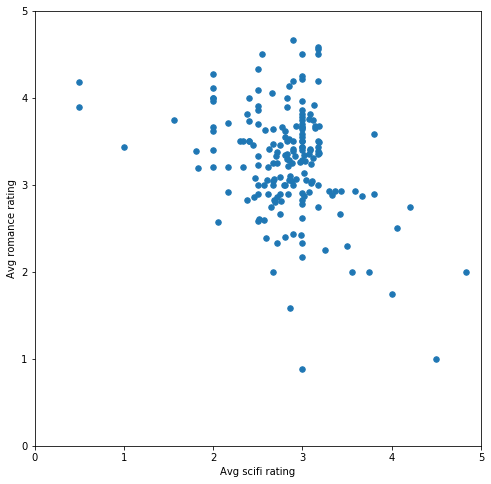

In [6]:
%matplotlib inline

helper.draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')

We can see come clear bias in this sample (that we created on purpose). How would it look if we break the sample down into two groups using k-means?

In [7]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values

* Import [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
* Prepare KMeans with n_clusters = 2
* Pass the dataset **X** to KMeans' fit_predict method and retrieve the clustering labels into *predictions*

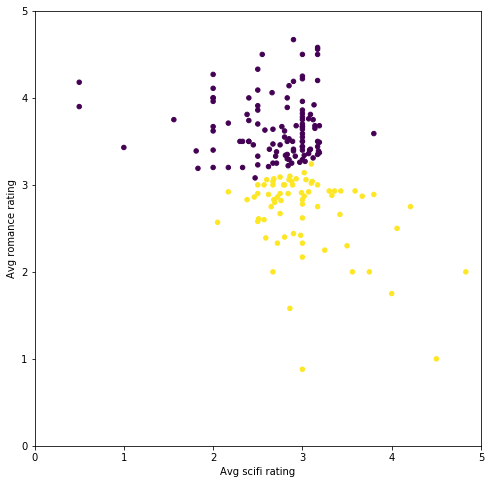

In [8]:
# TODO: Import KMeans
from sklearn.cluster import KMeans

# TODO: Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters = 2, random_state = 0)

# TODO: use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions)

We can see that the groups are mostly based on how each person rated romance movies. If their average rating of romance movies is over 3 stars, then they belong to one group. Otherwise, they belong to the other group.

What would happen if we break them down into three groups?

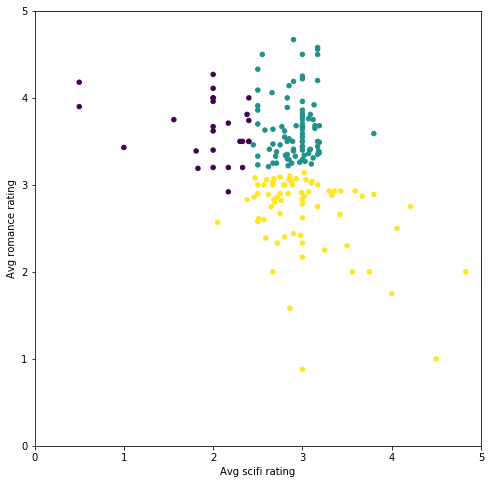

In [9]:

# TODO: Create an instance of KMeans to find three clusters
kmeans_2 = KMeans(n_clusters = 3, random_state = 1)

# TODO: use fit_predict to cluster the dataset
predictions_2 = kmeans_2.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_2)

Now the average scifi rating is starting to come into play. The groups are:
 * people who like romance but not scifi
 * people who like scifi but not romance
 * people who like both scifi and romance
 
Let's add one more group

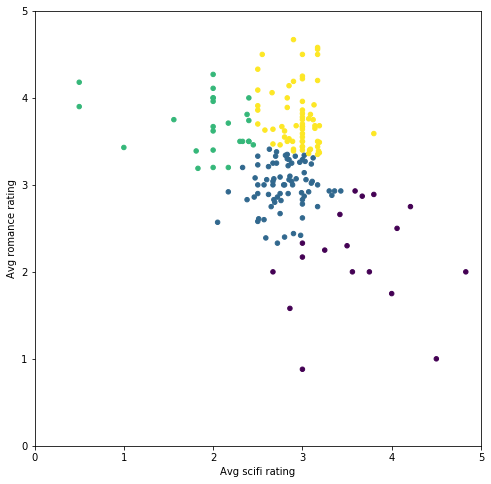

In [10]:
# TODO: Create an instance of KMeans to find four clusters
kmeans_3 = KMeans(n_clusters = 4, random_state = 2)

# TODO: use fit_predict to cluster the dataset
predictions_3 = kmeans_3.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_3)

We can see that the more clusters we break our dataset down into, the more similar the tastes of the population of each cluster to each other.

## Choosing K
Great, so we can cluster our points into any number of clusters. What's the right number of clusters for this dataset?

There are [several](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) ways of choosing the number of clusters, k. We'll look at a simple one called "the elbow method". The elbow method works by plotting the ascending values of k versus the total error calculated using that k. 

How do we calculate total error?
One way to calculate the error is squared error. Say we're calculating the error for k=2. We'd have two clusters each having one "centroid" point. For each point in our dataset, we'd subtract its coordinates from the centroid of the cluster it belongs to. We then square the result of that subtraction (to get rid of the negative values), and sum the values. This would leave us with an error value for each point. If we sum these error values, we'd get the total error for all points when k=2.

Our mission now is to do the same for each k (between 1 and, say, the number of elements in our dataset)

In [11]:
# Choose the range of k values to test.
# We added a stride of 5 to improve performance. We don't need to calculate the error for every k value
possible_k_values = range(2, len(X)+1, 5)

# Calculate error values for all k values we're interested in
errors_per_k = [helper.clustering_errors(k, X) for k in possible_k_values]


C:\Users\Mike\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (178) found smaller than n_clusters (182). Possibly due to duplicate points in X.
  return_n_iter=True)


In [12]:
# Optional: Look at the values of K vs the silhouette score of running K-means with that value of k
list(zip(possible_k_values, errors_per_k))

[(2, 0.3558817876472825),
 (7, 0.37190635201126143),
 (12, 0.3530047017584961),
 (17, 0.3589570689322687),
 (22, 0.3731147571293523),
 (27, 0.3617442394472468),
 (32, 0.3656037193580362),
 (37, 0.38478564196543186),
 (42, 0.36889908576645386),
 (47, 0.36960001070651544),
 (52, 0.36353153303753155),
 (57, 0.36195725145056956),
 (62, 0.3659953267668439),
 (67, 0.35586622756375164),
 (72, 0.3462249289097712),
 (77, 0.34525944587959606),
 (82, 0.3249038842663616),
 (87, 0.33258318545853216),
 (92, 0.32340537053202445),
 (97, 0.3338162562523694),
 (102, 0.3149690494263145),
 (107, 0.2987746682779076),
 (112, 0.2853874270576358),
 (117, 0.27700072770953893),
 (122, 0.2674515875451592),
 (127, 0.2614951106592406),
 (132, 0.24051579878953397),
 (137, 0.24130613970071027),
 (142, 0.2152344949172407),
 (147, 0.21276937059956288),
 (152, 0.1807898294333704),
 (157, 0.1683045693916678),
 (162, 0.14908026789632034),
 (167, 0.13049651573983667),
 (172, 0.09984309419914654),
 (177, 0.0642301201631745

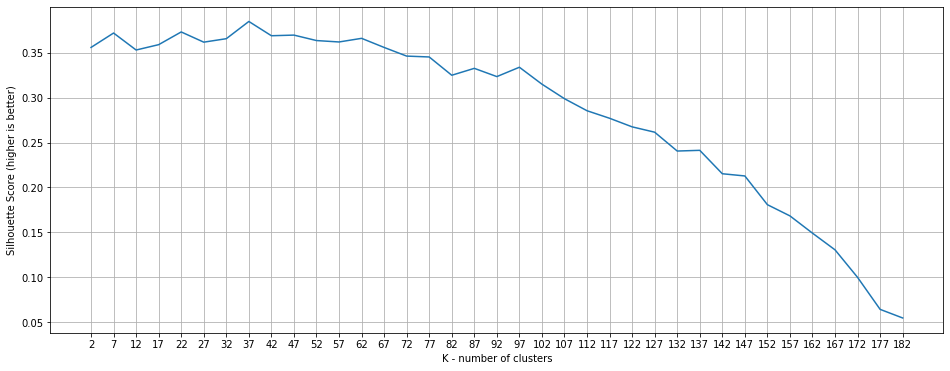

In [13]:
# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('K - number of clusters')
ax.set_ylabel('Silhouette Score (higher is better)')
ax.plot(possible_k_values, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

Looking at this graph, good choices for k include 7, 22, 27, 32, amongst other values (with a slight variation between different runs). Increasing the number of clusters (k) beyond that range starts to result in worse clusters (according to Silhouette score)

My pick would be k=7 because it's easier to visualize:  

Note: In my plot 22 and 37 had higher scores, but 7 is still a good choice because as it is mentioned above 7 clusters are easier to visualize than 37 and it is much faster to run the algorithm as well.

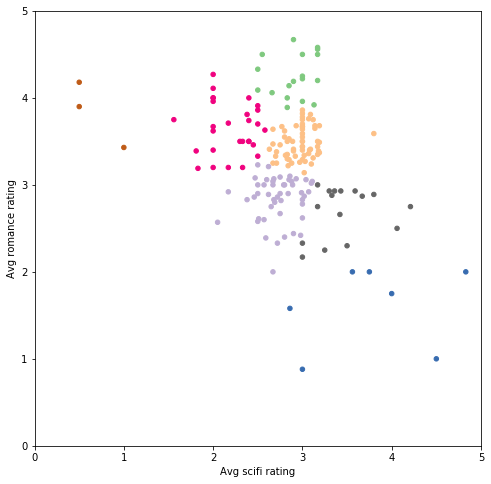

In [14]:
# TODO: Create an instance of KMeans to find seven clusters
kmeans_4 = KMeans(n_clusters = 7, random_state = 3)

# TODO: use fit_predict to cluster the dataset
predictions_4 = kmeans_4.fit_predict(X)

# plot
helper.draw_clusters(biased_dataset, predictions_4, cmap='Accent') 

Note: As you try to plot larger values of k (more than 10), you'll have to make sure your plotting library is not reusing colors between clusters. For this plot, we had to use the [matplotlib colormap](https://matplotlib.org/examples/color/colormaps_reference.html) 'Accent' because other colormaps either did not show enough contrast between colors, or were recycling colors past 8 or 10 clusters.


## Throwing some Action into the mix
So far, we've only been looking at how users rated romance and scifi movies. Let's throw another genre into the mix. Let's add the Action genre.

Our dataset now looks like this:

In [15]:
biased_dataset_3_genres = helper.get_genre_ratings(ratings, movies, 
                                                     ['Romance', 'Sci-Fi', 'Action'], 
                                                     ['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])
biased_dataset_3_genres = helper.bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna()

print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

Number of records:  183


,index,avg_romance_rating,avg_scifi_rating,avg_action_rating
0,1,3.50,2.40,2.80
1,3,3.65,3.14,3.47
2,6,2.90,2.75,3.27
3,7,2.93,3.36,3.29
4,12,2.89,2.62,3.21


In [16]:
X_with_action = biased_dataset_3_genres[['avg_scifi_rating',
                                         'avg_romance_rating', 
                                         'avg_action_rating']].values

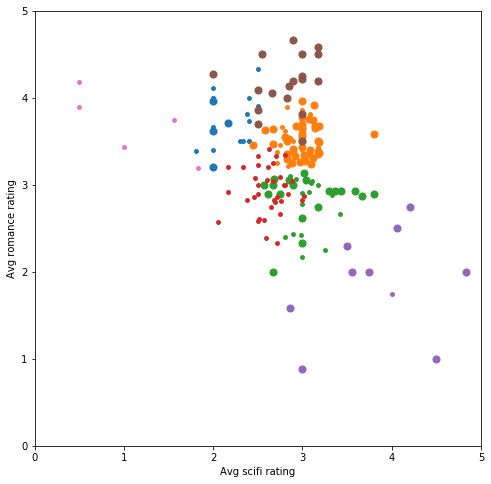

In [17]:
# TODO: Create an instance of KMeans to find seven clusters
kmeans_5 = KMeans(n_clusters = 7, random_state = 4)

# TODO: use fit_predict to cluster the dataset
predictions_5 = kmeans_5.fit_predict(X_with_action)

# plot
helper.draw_clusters_3d(biased_dataset_3_genres, predictions_5)

We're still using the x and y axes for scifi and romance respectively. We are using the size of the dot to roughly code the 'action' rating (large dot for avg ratings over than 3, small dot otherwise).

We can start seeing the added genre is changing how the users are clustered. The more data we give to k-means, the more similar the tastes of the people in each group would be. Unfortunately, though, we lose the ability to visualize what's going on past two or three dimensions if we continue to plot it this way. In the next section, we'll start using a different kind of plot to be able to see clusters with up to fifty dimensions.

## Movie-level Clustering
Now that we've established some trust in how k-means clusters users based on their genre tastes, let's take a bigger bite and look at how users rated individual movies. To do that, we'll shape the dataset in the form of userId vs user rating for each movie. For example, let's look at a subset of the dataset:

In [18]:
# Merge the two tables then pivot so we have Users X Movies dataframe
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')

print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (671, 9064) 

Subset example:


title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


The dominance of NaN values presents the first issue. Most users have not rated and watched most movies. Datasets like this are called "sparse" because only a small number of cells have values. 

To get around this, let's sort by the most rated movies, and the users who have rated the most number of movies. That will present a more 'dense' region when we peak at the top of the dataset.

If we're to choose the most-rated movies vs users with the most ratings, it would look like this:

In [19]:
n_movies = 30
n_users = 18
most_rated_movies_users_selection = helper.sort_by_rating_density(user_movie_ratings, n_movies, n_users)

print('dataset dimensions: ', most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()

dataset dimensions:  (18, 30)


title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Dances with Wolves (1990),Fight Club (1999),"Usual Suspects, The (1995)",Seven (a.k.a. Se7en) (1995),"Lion King, The (1994)","Godfather, The (1972)","Lord of the Rings: The Fellowship of the Ring, The (2001)",Apollo 13 (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
29,5.0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,5.0,4.0,5.0,4.0,3.0,5.0,3.0,5.0,4.0,2.0
508,4.0,5.0,4.0,4.0,5.0,3.0,4.5,3.0,5.0,2.0,...,5.0,4.0,5.0,4.0,3.5,5.0,4.5,3.0,2.0,4.0
14,1.0,5.0,2.0,5.0,5.0,3.0,5.0,2.0,4.0,4.0,...,3.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,4.0
72,5.0,5.0,5.0,4.5,4.5,4.0,4.5,5.0,5.0,3.0,...,4.5,5.0,5.0,5.0,5.0,5.0,5.0,3.5,3.0,5.0
653,4.0,5.0,5.0,4.5,5.0,4.5,5.0,5.0,5.0,5.0,...,4.5,5.0,5.0,4.5,5.0,4.5,5.0,5.0,4.0,5.0


That's more like it. Let's also establish a good way for visualizing these ratings so we can attempt to visually recognize the ratings (and later, clusters) when we look at bigger subsets.

Let's use colors instead of the number ratings:

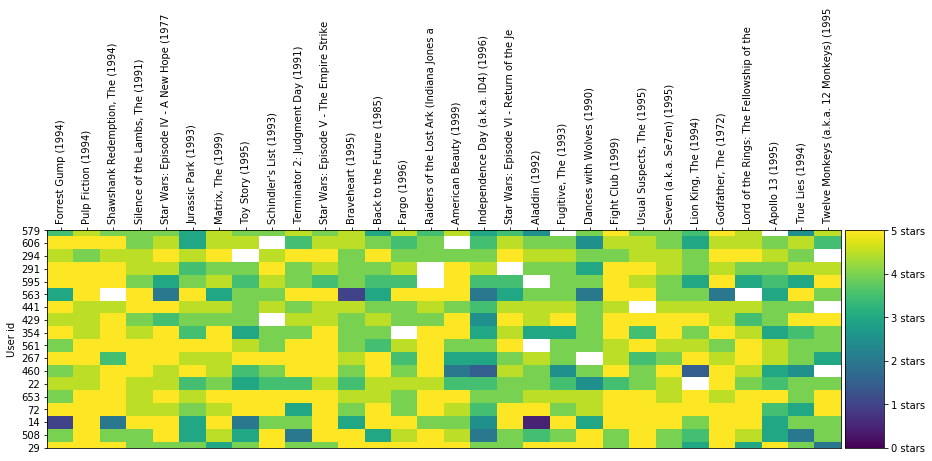

In [20]:
helper.draw_movies_heatmap(most_rated_movies_users_selection)

Each column is a movie. Each row is a user. The color of the cell is how the user rated that movie based on the scale on the right of the graph.

Notice how some cells are white? This means the respective user did not rate that movie. This is an issue you'll come across when clustering in real life. Unlike the clean example we started with, real-world datasets can often be sparse and not have a value in each cell of the dataset. This makes it less straightforward to cluster users directly by their movie ratings as k-means generally does not like missing values.

For performance reasons, we'll only use ratings for 1000 movies (out of the 9000+ available in the dataset).

In [21]:
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = helper.get_most_rated_movies(user_movie_ratings, 1000)

To have sklearn run k-means clustering to a dataset with missing values like this, we will first cast it to the [sparse csr matrix](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.sparse.csr_matrix.html) type defined in the SciPi library. 

To convert from a pandas dataframe to a sparse matrix, we'll have to convert to SparseDataFrame, then use pandas' `to_coo()` method for the conversion.

Note: `to_coo()` was only added in later versions of pandas. If you run into an error with the next cell, make sure pandas is up to date.

In [22]:
sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())

C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  """Entry point for launching an IPython kernel.
C:\Users\Mike\Anaconda3\lib\site-packages\pandas\core\frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return klass(values, index=self.index, name=items, fastpath=True)


## Clustering
With k-means, we have to specify k, the number of clusters. Let's arbitrarily try k=20 (A better way to pick k is as illustrated above with the elbow method. That would take some processing time to run, however.):

In [23]:
# 20 clusters
predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_ratings)

To visualize some of these clusters, we'll plot each cluster as a heat map:

cluster # 9
# of users in cluster: 271. # of users in plot: 70
cluster # 6
# of users in cluster: 43. # of users in plot: 43
cluster # 5
# of users in cluster: 34. # of users in plot: 34
cluster # 16
# of users in cluster: 69. # of users in plot: 69
cluster # 11
# of users in cluster: 64. # of users in plot: 64
cluster # 3
# of users in cluster: 26. # of users in plot: 26
cluster # 19
# of users in cluster: 34. # of users in plot: 34
cluster # 1
# of users in cluster: 10. # of users in plot: 10
cluster # 2
# of users in cluster: 37. # of users in plot: 37
cluster # 7
# of users in cluster: 16. # of users in plot: 16
cluster # 10
# of users in cluster: 32. # of users in plot: 32


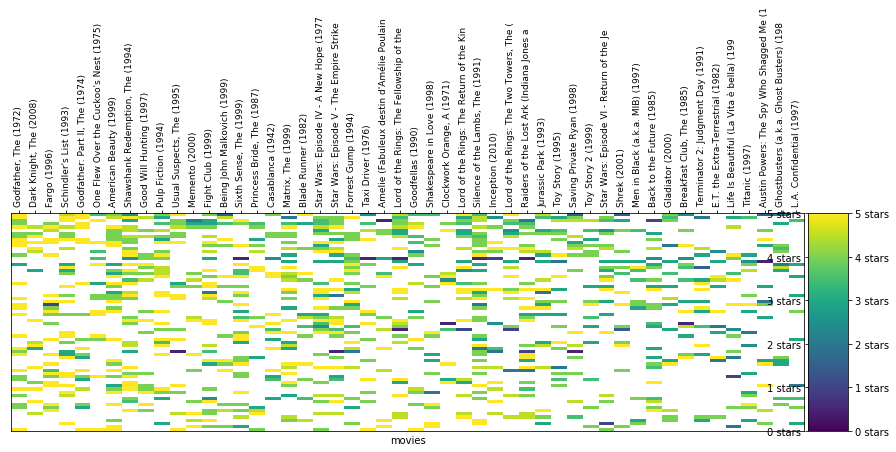

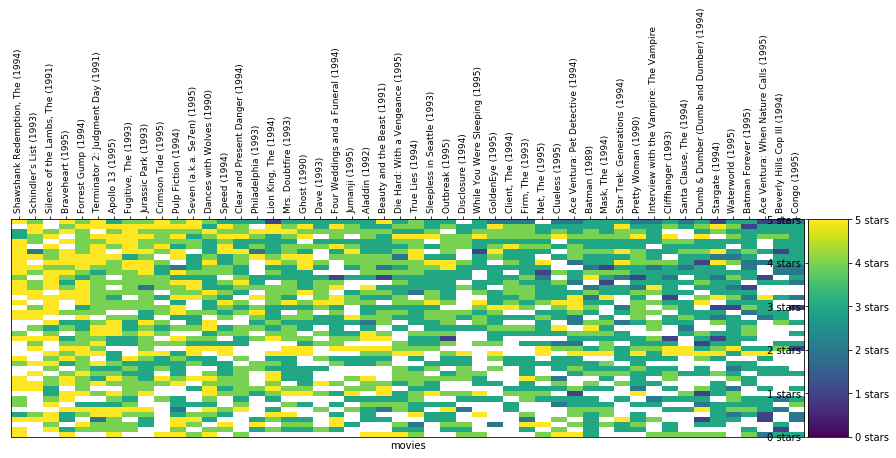

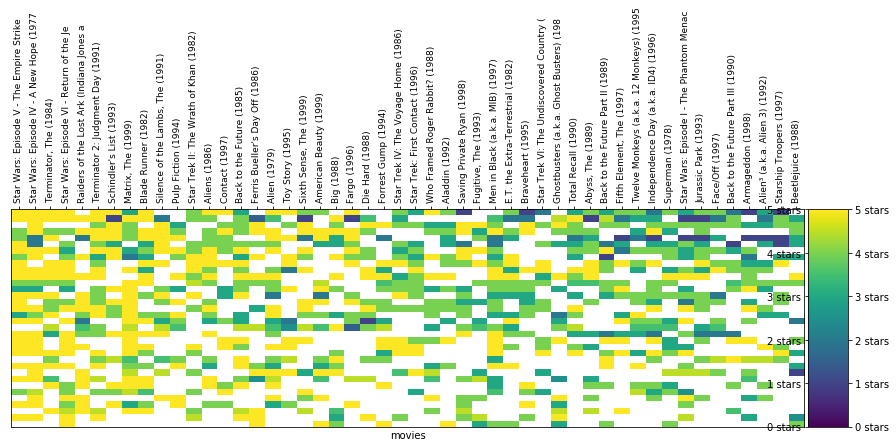

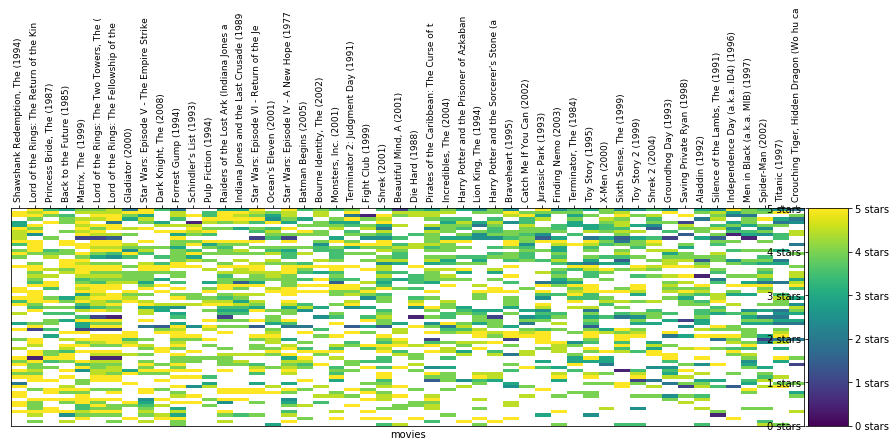

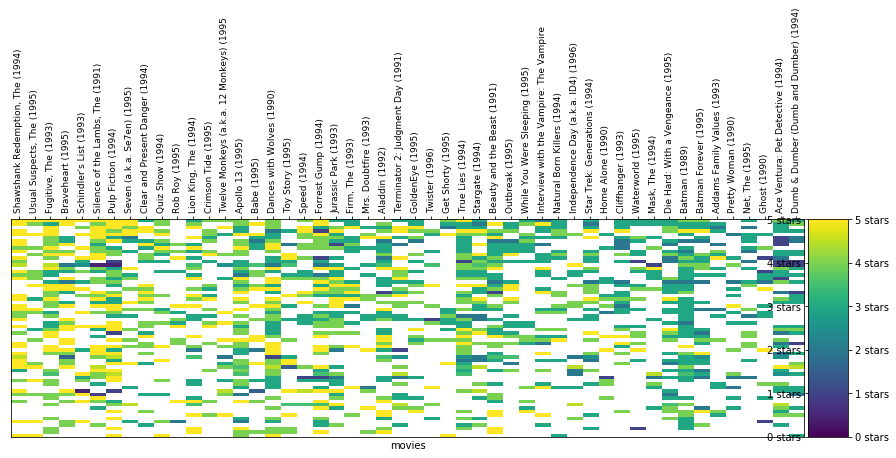

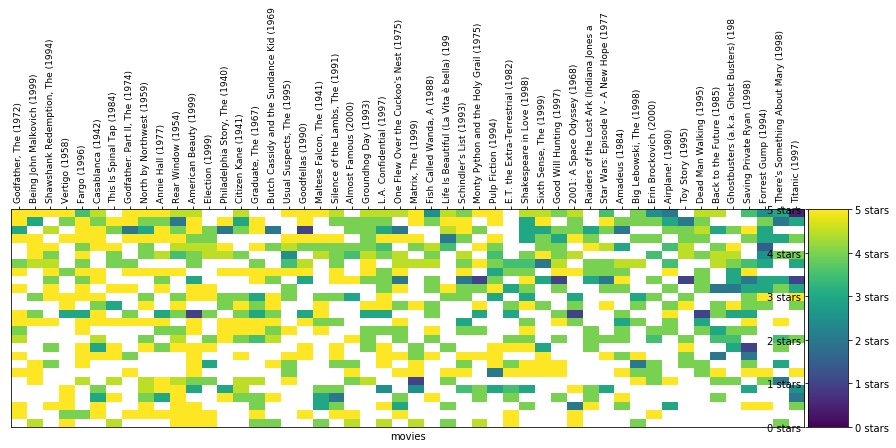

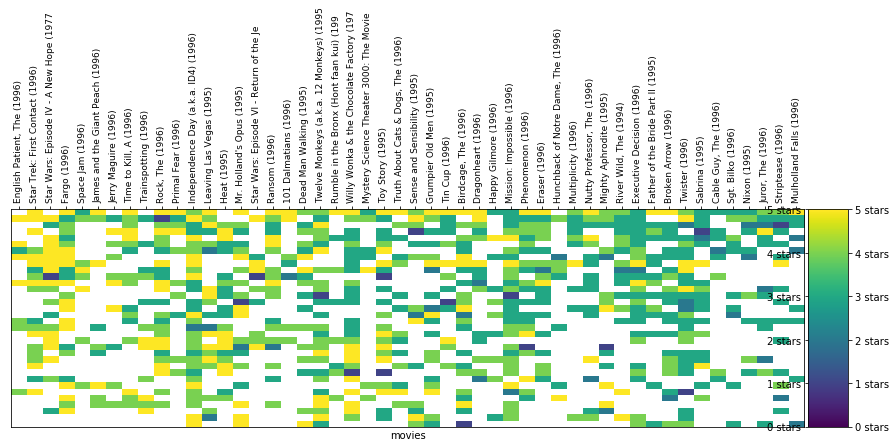

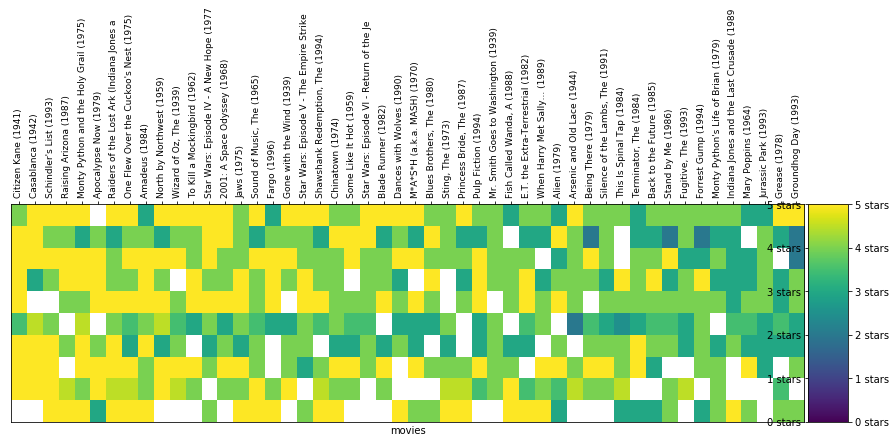

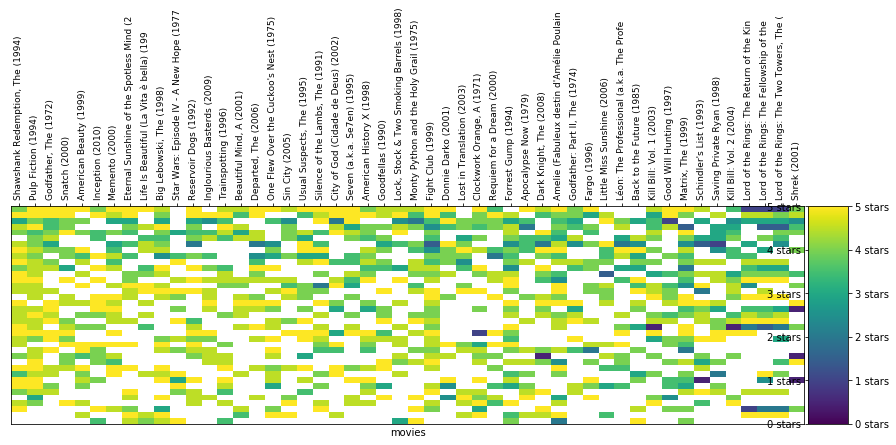

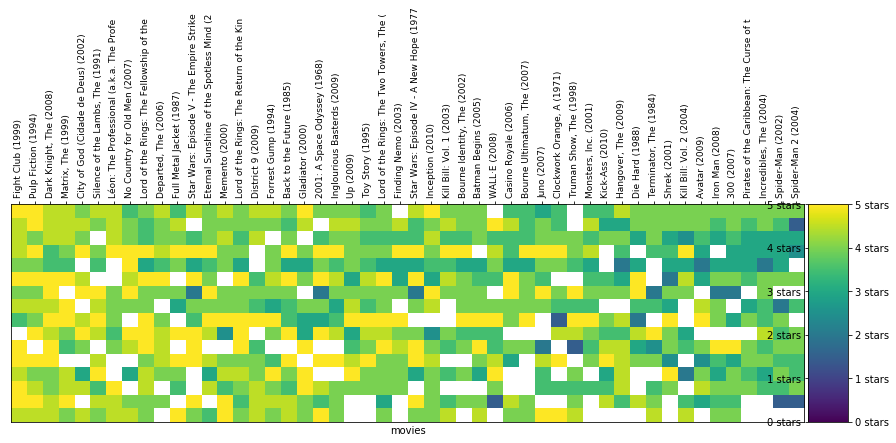

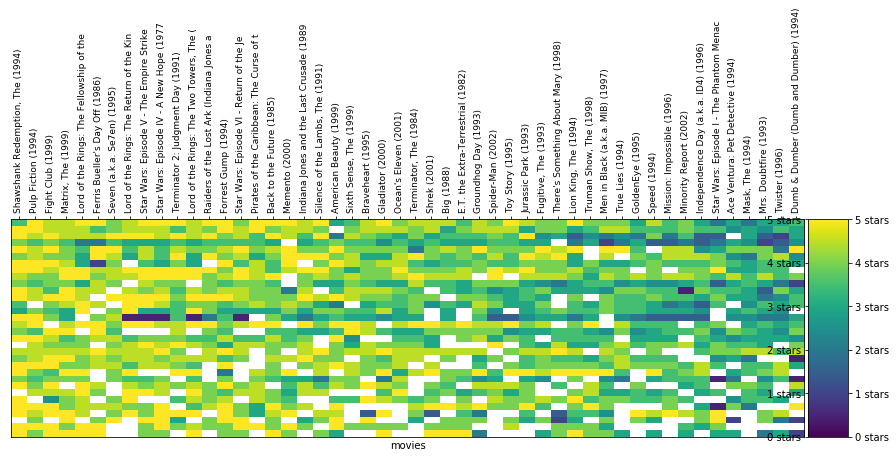

In [24]:
max_users = 70
max_movies = 50

clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
helper.draw_movie_clusters(clustered, max_users, max_movies)

There are several things to note here:
* The more similar the ratings in a cluster are, the more **vertical** lines in similar colors you'll be able to trace in that cluster. 
* It's super interesting to spot trends in clusters:
 * Some clusters are more sparse than others, containing people who probably watch and rate less movies than in other clusters.
 * Some clusters are mostly yellow and bring together people who really love a certain group of movies. Other clusters are mostly green or navy blue meaning they contain people who agree that a certain set of movoies deserves 2-3 stars.
 * Note how the movies change in every cluster. The graph filters the data to only show the most rated movies, and then sorts them by average rating.
 * Can you track where the Lord of the Rings movies appear in each cluster? What about Star Wars movies?
* It's easy to spot **horizontal** lines with similar colors, these are users without a lot of variety in their ratings. This is likely one of the reasons for Netflix switching from a stars-based ratings to a thumbs-up/thumbs-down rating. A rating of four stars means different things to different people.
* We did a few things to make the clusters visibile (filtering/sorting/slicing). This is because datasets like this are "sparse" and most cells do not have a value (because most people did not watch most movies). 

## Prediction
Let's pick a cluster and a specific user and see what useful things this clustering will allow us to do.

Let's first pick a cluster:

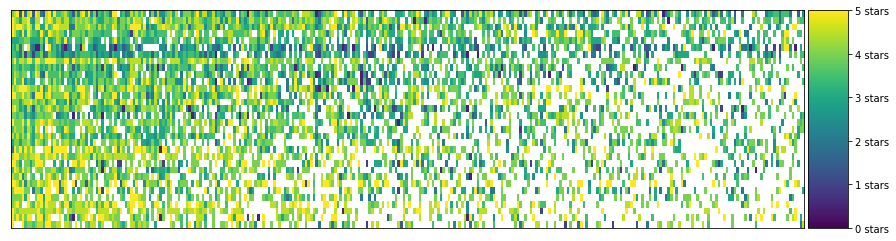

In [25]:
# TODO: Pick a cluster ID from the clusters above
cluster_number = 10

# Let's filter to only see the region of the dataset with the most number of values 
n_users = 75
n_movies = 300
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)

cluster = helper.sort_by_rating_density(cluster, n_movies, n_users)
helper.draw_movies_heatmap(cluster, axis_labels=False)

And the actual ratings in the cluster look like this:

In [26]:
cluster.fillna('').head()

,Forrest Gump (1994),"Matrix, The (1999)",Back to the Future (1985),"Lion King, The (1994)",Fight Club (1999),Men in Black (a.k.a. MIB) (1997),Pulp Fiction (1994),Jurassic Park (1993),Mrs. Doubtfire (1993),Star Wars: Episode V - The Empire Strikes Back (1980),...,"Santa Clause, The (1994)",Misery (1990),City of God (Cidade de Deus) (2002),Taxi Driver (1976),Zoolander (2001),Young Frankenstein (1974),"Dark Knight, The (2008)",Tomorrow Never Dies (1997),School of Rock (2003),Mr. Holland's Opus (1995)
22,4.0,4.5,5,1.5,5,2,4.5,5,1.5,5,...,2,3.5,3.5,3.5,2,,,1.5,,2.5
30,5.0,4.5,4,3,4.5,4.5,5,3,2.5,4.5,...,2,3.5,,,3.5,,,4,3.5,3.5
11,5.0,4.5,5,5,4.5,4,5,4.5,3,5,...,3.5,,,3,,5,5,,,
28,5.0,4.5,3.5,3,5,3,5,4,3.5,3.5,...,,3.5,5,5,,,,3.5,3.5,
3,3.0,3,3,3.5,3.5,4,4,3,3,3,...,,4,5,4,,4,,,,


Pick a blank cell from the table. It's blank because that user did not rate that movie. Can we predict whether she would like it or not? Since the user is in a cluster of users that seem to have similar taste, we can take the average of the votes for that movie in this cluster, and that would be a reasonable predicition for much she would enjoy the film.

In [27]:
# TODO: Fill in the name of the column/movie. e.g. 'Forrest Gump (1994)'
# Pick a movie from the table above since we're looking at a subset
movie_name = 'Misery (1990)'

cluster[movie_name].mean()

3.8181818181818183

And this would be our prediction for how she'd rate the movie.

## Recommendation
Let's reiterate what we did in the previous step. We have used k-means to cluster users according to their ratings. This lead us to clusters of users with similar ratings and thus generally a similar taste in movies. Based on this, when one user did not have a rating for a certain movie  we averaged the ratings of all the other users in the cluster, and that was our guess to how this one user would like the movie.

Using this logic, if we calculate the average score in this cluster for every movie, we'd have an understanding for how this 'taste cluster' feels about each movie in the dataset. 


In [28]:
# The average rating of 20 movies as rated by the users in the cluster
cluster.mean().head(20)

Forrest Gump (1994)                                          4.156250
Matrix, The (1999)                                           4.354839
Back to the Future (1985)                                    4.112903
Lion King, The (1994)                                        3.661290
Fight Club (1999)                                            4.400000
Men in Black (a.k.a. MIB) (1997)                             3.600000
Pulp Fiction (1994)                                          4.433333
Jurassic Park (1993)                                         3.783333
Mrs. Doubtfire (1993)                                        3.086207
Star Wars: Episode V - The Empire Strikes Back (1980)        4.241379
Star Wars: Episode IV - A New Hope (1977)                    4.206897
American Beauty (1999)                                       4.034483
Independence Day (a.k.a. ID4) (1996)                         3.258621
Lord of the Rings: The Fellowship of the Ring, The (2001)    4.327586
Shawshank Redemption

This becomes really useful for us because we can now use it as a recommendation engine that enables our users to discover movies they're likely to enjoy.

When a user logs in to our app, we can now show them recommendations that are appropriate to their taste. The formula for these recommendations is to select the cluster's highest-rated movies that the user did not rate yet.


In [29]:
# TODO: Pick a user ID from the dataset
# Look at the table above outputted by the command "cluster.fillna('').head()" 
# and pick one of the user ids (the first column in the table)
user_id = 30

# Get all this user's ratings
user_2_ratings  = cluster.loc[user_id, :]

# Which movies did they not rate? (We don't want to recommend movies they've already rated)
user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]

# What are the ratings of these movies the user did not rate?
avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]

# Let's sort by rating so the highest rated movies are presented first
avg_ratings.sort_values(ascending=False)[:20]

Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    4.321429
Schindler's List (1993)                                 4.305556
Departed, The (2006)                                    4.269231
Big Fish (2003)                                         4.227273
Moulin Rouge (2001)                                     4.208333
Run Lola Run (Lola rennt) (1998)                        4.208333
Taxi Driver (1976)                                      4.181818
Eternal Sunshine of the Spotless Mind (2004)            4.178571
City of God (Cidade de Deus) (2002)                     4.136364
American History X (1998)                               4.115385
Jaws (1975)                                             4.100000
One Flew Over the Cuckoo's Nest (1975)                  4.083333
Saving Private Ryan (1998)                              4.080000
Edward Scissorhands (1990)                              4.071429
Wizard of Oz, The (1939)                                4.058824
Young Frankenstein (1974)

### Quiz:
 * If the cluster had a movie with only one rating. And that rating was 5 stars. What would the average rating of the cluster for that movie be? How does that effect our simple recommendation engine? How would you tweak the recommender to address this issue?

#### Answer
 * The average rating of the cluster for that movie would be 5 stars (5/1), but the fact that having one user controlling the average of a whole cluster is not right. In order to fix this, there should a limit of total ratings, so that we have enough opinions to rate properly a movie. Also it could mention how many ratings each recommendation has or if there are enough ratings or not like a binary system depending on the limit we set earlier.

### Question
1) Describe one real-world application in industry where the model can be applied.  
2) What are the strengths of the model; when does it perform well?  
3) What are the weaknesses of the model; when does it perform poorly?  
4) What makes this model a good candidate for the problem, given what you know about the data?  

Please include references with your answer.

#### Answer  
1) Real-world applications of K-Means Clustering  
- Market segmentation  
- Document clustering  
- Image segmentation  
- Image compression  
- Vector quantization  
- Cluster analysis  
- Feature learning or dictionary learning  
- Identifying crime-prone areas  
- Insurance fraud detection  
- Public transport data analysis  
- Clustering of IT assets  
- Customer segmentation  
- Identifying Cancerous data  
- K Means Clustering algorithm is used by most of the search engines like Yahoo, Google to cluster web pages by similarity and identify the ‘relevance rate’ of search results. This helps search engines reduce the computational time for the users.  
- Drug Activity Prediction  

2) Advantages of K-Means Clustering Algorithm  

- It is fast. Given a smaller value of K, K-Means clustering computes faster than hierarchical clustering for large number of variables.    
- Robust  
- Easy to understand.  
- Comparatively efficient  
- If data sets are distinct then gives the best results.  
- Produce tighter clusters. In case of globular clusters, K-Means produces tighter clusters than hierarchical clustering.    
- When centroids are recomputed the cluster changes.  
- Flexible  
- Easy to interpret.  
- Better computational cost.  
- Enhances Accuracy.   
- Works better with spherical clusters.  

3) Disadvantages of K-Means Clustering Algorithm  

- Needs prior specification for the number of cluster centers.  
- If there are two highly overlapping data then it cannot be distinguished and cannot tell that there are two clusters.  
- With the different representation of the data, the results achieved are also different.  
- Euclidean distance can unequally weight the factors.  
- It gives the local optima of the squared error function.  
- Sometimes choosing the centroids randomly cannot give fruitful results.  
- Can be used only if the meaning is defined.  
- Cannot handle outliers and noisy data.  
- Do not work for the non-linear data set.  
- Lacks consistency.  
- Sensitive to scale.  
- If very large data sets are encountered then the computer may crash.  
- Prediction issues.  

4) K-Means clustering algorithm is a good candidate for the movies-ratings problem:  
- It's easy to visualize our clusters.  
- It is very flexible depending on how much clusters we want.  
- We chose a small = k so that the algoritgh runs fast enough.
- We can predict and recommend movies to existing users because we have categorized them in similar taste clusters.  
- We did a data cleaning for sci-fi and romance movies, so that we could have distinct data sets.


References:  
https://www.educba.com/k-means-clustering-algorithm/  
https://www.dezyre.com/article/top-10-machine-learning-algorithms/202

## (TODO)  Describe your conclusions  

In this notebook we learned how to use K-Means algorithm in order to cluster our data. We had two csv files, movies and ratings. In the beginning we compared in a plot the average ratings of romance and sci-fi movies from users who didn't like both of them. After that we applied K-Means algorith to our data and we plotted the same plot for different values of K-the amount of clusters. We compared the results and choose an ideal number of clusters. Then we added action genre in the mix. We moved on clustering users' ratings for individual movies. We implemented a recommendation system to give a movie list to a user, which they haven't seen yet, based on ratings from other people in the same cluster. Finally we dived into K-Means algorithm answering the next questions. Where is it used, what's its advantages and disadvantages and why we could use it in our problem knowing our data?  